In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import pandas as pd


In [ ]:
#housing = pd.read_csv('housing.csv')
# dataset taken from https://www.kaggle.com/camnugent/california-housing-prices#x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.median_house_value, test_size = 0.2)
#x_train.shape

In [119]:
# create dummy data
x_values = [i for i in range(20)]
x = np.array(x_values, dtype=np.float32)
x = x.reshape(-1, 1)

y_values = [2*i + 1 +  5*np.random.normal() for i in x_values] # small noise added
y = np.array(y_values, dtype=np.float32)
y = y.reshape(-1, 1)
y.shape

(20, 1)

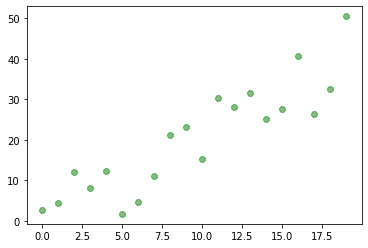

In [120]:
plt.plot(x, y, 'go', label='True data', alpha=0.5)

In [121]:
# simple linear regression model
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [133]:
inputDim = 1        
outputDim = 1      
learningRate = 0.005
epochs = 200

model = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model.cuda()

In [134]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [135]:
for epoch in range(epochs):
    model.train()
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x).cuda())
        labels = Variable(torch.from_numpy(y).cuda())
    else:
        inputs = Variable(torch.from_numpy(x))
        labels = Variable(torch.from_numpy(y))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    #print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 513.289306640625
epoch 1, loss 63.543617248535156
epoch 2, loss 37.130184173583984
epoch 3, loss 35.57511901855469
epoch 4, loss 35.47978591918945
epoch 5, loss 35.470176696777344
epoch 6, loss 35.46562957763672
epoch 7, loss 35.46139907836914
epoch 8, loss 35.457210540771484
epoch 9, loss 35.45304489135742
epoch 10, loss 35.44889831542969
epoch 11, loss 35.44477844238281
epoch 12, loss 35.44068145751953
epoch 13, loss 35.43659210205078
epoch 14, loss 35.43254470825195
epoch 15, loss 35.42851257324219
epoch 16, loss 35.424495697021484
epoch 17, loss 35.420509338378906
epoch 18, loss 35.41653823852539
epoch 19, loss 35.4125862121582
epoch 20, loss 35.408653259277344
epoch 21, loss 35.404747009277344
epoch 22, loss 35.40086364746094
epoch 23, loss 35.39699935913086
epoch 24, loss 35.393157958984375
epoch 25, loss 35.38933563232422
epoch 26, loss 35.38552474975586
epoch 27, loss 35.38174057006836
epoch 28, loss 35.37798309326172
epoch 29, loss 35.374237060546875
epoch 30, lo

In [136]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x))).data.numpy()

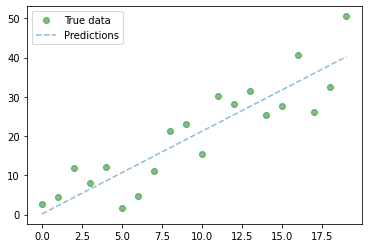

In [137]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [138]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[2.1086]])
linear.bias tensor([0.1656])


In [140]:
# let's delete point at index 2
x_r = np.delete(x, [i for i in range(10, 18)])
y_r = np.delete(y, [i for i in range(10, 18)])
x_r = x_r.reshape(-1, 1)
y_r = y_r.reshape(-1, 1)

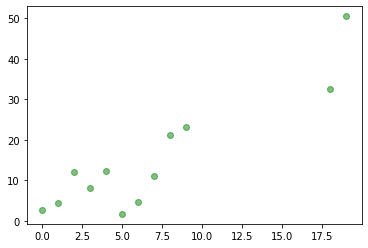

In [141]:
plt.plot(x_r, y_r, 'go', label='True data', alpha=0.5)

In [142]:
inputDim = 1        
outputDim = 1      
learningRate = 0.005 
epochs = 100

model_retrain = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model_retain.cuda()

In [143]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model_retrain.parameters(), lr=learningRate)

In [144]:
for epoch in range(epochs):
    model_retrain.train()
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_r).cuda())
        labels = Variable(torch.from_numpy(y_r).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_r))
        labels = Variable(torch.from_numpy(y_r))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model_retrain(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    #print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 231.3712921142578
epoch 1, loss 41.35001754760742
epoch 2, loss 34.78163528442383
epoch 3, loss 34.55046081542969
epoch 4, loss 34.53823471069336
epoch 5, loss 34.53361129760742
epoch 6, loss 34.529273986816406
epoch 7, loss 34.52499008178711
epoch 8, loss 34.520748138427734
epoch 9, loss 34.51652145385742
epoch 10, loss 34.512351989746094
epoch 11, loss 34.50820541381836
epoch 12, loss 34.50409698486328
epoch 13, loss 34.50001907348633
epoch 14, loss 34.4959831237793
epoch 15, loss 34.491973876953125
epoch 16, loss 34.48800277709961
epoch 17, loss 34.48405838012695
epoch 18, loss 34.480159759521484
epoch 19, loss 34.47627639770508
epoch 20, loss 34.47243881225586
epoch 21, loss 34.468631744384766
epoch 22, loss 34.4648551940918
epoch 23, loss 34.46110153198242
epoch 24, loss 34.457393646240234
epoch 25, loss 34.45370864868164
epoch 26, loss 34.45005416870117
epoch 27, loss 34.44643020629883
epoch 28, loss 34.442840576171875
epoch 29, loss 34.43927764892578
epoch 30, loss

In [145]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted_r = model_retrain(Variable(torch.from_numpy(x_r).cuda())).cpu().data.numpy()
    else:
        predicted_r = model_retrain(Variable(torch.from_numpy(x_r))).data.numpy()

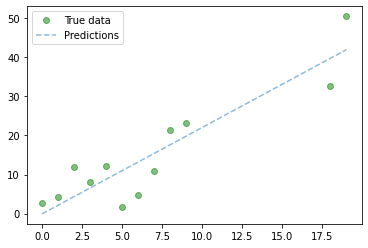

In [146]:
plt.clf()
plt.plot(x_r, y_r, 'go', label='True data', alpha=0.5)
plt.plot(x_r, predicted_r, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [147]:
weights = np.array([], dtype=np.float32)
for name, param in model_retrain.named_parameters():
    if param.requires_grad:
        print (name, param.data)
        weights = np.append(weights, param.data)
weights

linear.weight tensor([[2.2137]])
linear.bias tensor([-0.0798])


array([ 2.2136686 , -0.07978027], dtype=float32)

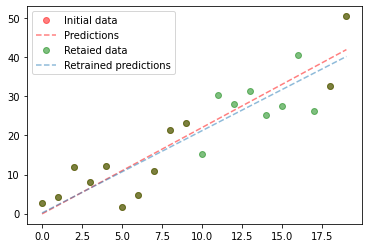

In [148]:
plt.clf()
plt.plot(x_r, y_r, 'go', color='red', label='Initial data', alpha=0.5)
plt.plot(x_r, predicted_r, '--', c='red', label='Predictions', alpha=0.5)
plt.plot(x, y, 'go', label='Retaied data', alpha=0.5)
plt.plot(x, predicted, '--', label='Retrained predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [149]:
def reflected_coordinates(position, parameters):
    p, q = position
    b, c = parameters
    b =-1*b
    c =-1*c
    a = 1
    x_r = p*(a**2 - b**2) - 2*b*(a*q + c)*a**2 + b**2
    y_r = q*(b**2 - a**2) - 2*a*(b*p + c)*a**2 + b**2
    reflected = ((1 / (a**2 + b**2))*x_r, (1 / (a**2 + b**2))*y_r)
    return reflected
    
def get_weights(model):
    weights = np.array([], dtype=np.float32)
    for name, param in model.named_parameters():
        if param.requires_grad:
            weights = np.append(weights, param.data)
    return weights  

In [150]:
def forget(pos, model):
  for i in range(5):
    weights = get_weights(model)
    print(weights)
    ref = reflected_coordinates(pos, weights)
    for epoch in range(2):
      x_r, y_r = ref
      model.train()
      model = model.float()
      # Converting inputs and labels to Variable
      if torch.cuda.is_available():
          inputs = Variable(torch.tensor([x_r]).cuda())
          labels = Variable(torch.tensor([y_r]).cuda())
      else:
          inputs = Variable(torch.tensor([x_r]))#.double()
          labels = Variable(torch.tensor([y_r]))#.double()

      # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
      optimizer.zero_grad()

      # get output from the model, given the inputs
      outputs = model_retrain(inputs)

      # get loss for the predicted output
      loss = criterion(outputs, labels)
      #print(loss)
      # get gradients w.r.t to parameters
      loss.backward()

      # update parameters
      optimizer.step()
      print('epoch {}, loss {}'.format(epoch, loss.item()))  
  return model

In [54]:
model_forget = linearRegression(inputDim, outputDim)
model_forget.load_state_dict(model.state_dict())
weights = get_weights(model_forget)
weights

array([ 2.0243313 , -0.30278578], dtype=float32)

In [55]:
forget_model = forget((x_d, y_d), model_forget)

[ 2.0243313  -0.30278578]


RuntimeError: ignored

In [151]:
# OLD CODE
# find the reflected point with respect to a line
# for two dimensions we have eqn x_r, y_r = (p(a2−b2)−2b(aq+c)a2+b2,q(b2−a2)−2a(bp+c)a2+b2)
def reflected_coordinates(position, parameters):
    p, q = position
    b, c = parameters
    b =-1*b
    c =-1*c
    a = 1
    x_r = p*(a**2 - b**2) - 2*b*(a*q + c)*a**2 + b**2
    y_r = q*(b**2 - a**2) - 2*a*(b*p + c)*a**2 + b**2
    reflected = ((1 / (a**2 + b**2))*x_r, (1 / (a**2 + b**2))*y_r)
    return reflected

def reflect(x, y, line):
    x_reflected = np.array([], dtype=np.float32)
    y_reflected = np.array([], dtype=np.float32)
    for i in range(len(x)):
        coor = reflected_coordinates((x[i], y[i]), (line[0], line[1]))
        x_reflected = np.append(x_reflected, coor[0])
        y_reflected = np.append(y_reflected, coor[1])

    x_reflected = x_reflected.reshape(-1, 1)
    y_reflected = y_reflected.reshape(-1, 1)
    return x_reflected, y_reflected

def get_weights(model):
    weights = np.array([], dtype=np.float32)
    for name, param in model.named_parameters():
        if param.requires_grad:
            weights = np.append(weights, param.data)
    return weights
#find the geometric center of points
#def geometric_center(coor):
#    gm = np.sum(coor) / len(coor)
#    return gl, len(coor)
    

In [152]:
x_d = np.array([x[i] for i in range(10, 15)], dtype=np.float32)
x_d = x_d.reshape(-1, 1)
y_d = np.array([y[i] for i in range(10, 15)], dtype=np.float32)
y_d = y_d.reshape(-1, 1)
y_d

array([[15.359991],
       [30.309599],
       [28.146967],
       [31.483122],
       [25.242527]], dtype=float32)

In [174]:
model_forget = linearRegression(inputDim, outputDim)
model_forget.load_state_dict(model.state_dict())

<All keys matched successfully>

In [173]:
weights = get_weights(model_forget)
weights

array([-0.1690402, -7.8838725], dtype=float32)

In [81]:
# make reflected coordinates
'''
x_reflected = np.array([], dtype=np.float32)
y_reflected = np.array([], dtype=np.float32)
for i in range(len(x_d)):
    coor = reflected_coordinates((x_d[i], y_d[i]), ([2.0176], [2.0155]))
    x_reflected = np.append(x_reflected, coor[0])
    y_reflected = np.append(y_reflected, coor[1])

x_reflected = x_reflected.reshape(-1, 1)
y_reflected = y_reflected.reshape(-1, 1)
'''
x_reflected, y_reflected = reflect(x_d, y_d, weights)
x_reflected

array([[13.814478],
       [13.030933],
       [10.704045],
       [17.918037],
       [16.02231 ]], dtype=float32)

In [165]:
learningRate = 0.00005
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model_forget.parameters(), lr=learningRate)

In [211]:
model_forget = linearRegression(inputDim, outputDim)
model_forget.load_state_dict(model.state_dict())
learningRate = 0.000005
criterion = torch.nn.MSELoss() 

for i in range(2):
  print("Iteration: ", i)
  weights = get_weights(model_forget)
  x_reflected, y_reflected = reflect(x_d, y_d, weights)
  optimizer = torch.optim.SGD(model_forget.parameters(), lr=learningRate)
  for epoch in range(10):
      model_forget.train()
      # Converting inputs and labels to Variable
      if torch.cuda.is_available():
          inputs = Variable(torch.from_numpy(x_reflected).cuda())
          labels = Variable(torch.from_numpy(y_reflected).cuda())
      else:
          inputs = Variable(torch.from_numpy(x_reflected))
          labels = Variable(torch.from_numpy(y_reflected))

      # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
      optimizer.zero_grad()

      # get output from the model, given the inputs
      outputs = model_forget(inputs)

      # get loss for the predicted output
      loss = criterion(outputs, labels)
      #print(loss)
      # get gradients w.r.t to parameters
      loss.backward()

      # update parameters
      optimizer.step()
      
      weights = get_weights(model_forget)
      #print(weights)
      x_reflected, y_reflected = reflect(x_d, y_d, weights)
      #print(x_reflected, y_reflected)

      print('epoch {}, loss {}'.format(epoch, loss.item()))

Iteration:  0
epoch 0, loss 27.010971069335938
epoch 1, loss 27.02450180053711
epoch 2, loss 27.038089752197266
epoch 3, loss 27.051721572875977
epoch 4, loss 27.06545066833496
epoch 5, loss 27.079242706298828
epoch 6, loss 27.093067169189453
epoch 7, loss 27.10699462890625
epoch 8, loss 27.1209659576416
epoch 9, loss 27.13498306274414
Iteration:  1
epoch 0, loss 27.149051666259766
epoch 1, loss 27.1632080078125
epoch 2, loss 27.177474975585938
epoch 3, loss 27.191753387451172
epoch 4, loss 27.206127166748047
epoch 5, loss 27.22052574157715
epoch 6, loss 27.235004425048828
epoch 7, loss 27.249608993530273
epoch 8, loss 27.264171600341797
epoch 9, loss 27.278873443603516


In [212]:
get_weights(model_forget)

array([2.1005936 , 0.16524991], dtype=float32)

In [213]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted_d = model_forget(Variable(torch.from_numpy(x).cuda())).cpu().data.numpy()
    else:
        predicted_d = model_forget(Variable(torch.from_numpy(x))).data.numpy()

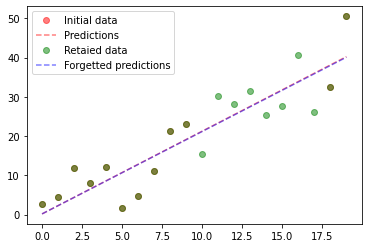

In [214]:
plt.clf()
plt.plot(x_r, y_r, 'go', color='red', label='Initial data', alpha=0.5)
plt.plot(x, predicted, '--', c='red', label='Predictions', alpha=0.5)
plt.plot(x, y, 'go', label='Retaied data', alpha=0.5)
#plt.plot(x_r, predicted_r, '--', label='Retrained predictions', alpha=0.5)
plt.plot(x, predicted_d, '--', c='blue', label='Forgetted predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

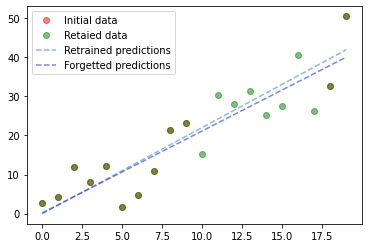

In [215]:
plt.clf()
plt.plot(x_r, y_r, 'go', color='red', label='Initial data', alpha=0.5)
#plt.plot(x, predicted, '--', c='red', label='Predictions', alpha=0.5)
plt.plot(x, y, 'go', label='Retaied data', alpha=0.5)
plt.plot(x_r, predicted_r, '--', label='Retrained predictions', alpha=0.5)
plt.plot(x, predicted_d, '--', c='blue', label='Forgetted predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [ ]:
# simple linear regression model
class MLP(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out